In [5]:
import os, arrow
from elasticsearch import Elasticsearch
from datetime import datetime
from config import SOC_ES_HOST,SOC_ES_USER, SOC_ES_PASSWORD, SOC_ES_PORT

import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import nltk
import pandas as pd

In [2]:
es = Elasticsearch([SOC_ES_HOST], http_auth=(SOC_ES_USER, SOC_ES_PASSWORD), port=SOC_ES_PORT, timeout=60)


In [10]:
import os
import arrow
from elasticsearch import Elasticsearch
from datetime import datetime
from config import SOC_ES_HOST, SOC_ES_USER, SOC_ES_PASSWORD, SOC_ES_PORT

es = Elasticsearch([SOC_ES_HOST], http_auth=(SOC_ES_USER, SOC_ES_PASSWORD), port=SOC_ES_PORT, timeout=60)

index = 'covidtweets'
query = 'full_text:covid'
data = []

def set_el_string(query: str) -> str:
    return "%s" % query.replace('|', 'OR') \
        .replace('/', '') \
        .replace('&', ' AND ')


def get_news(index: str, keyword: dict, query=str,
             start=int(arrow.get("2020-01-01").timestamp()),
             end=int(arrow.get("2020-01-02").timestamp()),
             doc=None):
    query = set_el_string(keyword['keywords']) + " AND " + query + " AND timestamp:[{} TO {}]".format(start, end)
    print(query)

    if es.indices.exists(index=index):
        res = es.search(index=index, body=doc, scroll="1m")
        i=0
        while i<100:
            try:
                sid = res['_scroll_id']
                # get batch with data
                scroll_res = res['hits']['hits']
                data.extend(scroll_res)
                # get next batch
                res = es.scroll(scroll_id=sid, scroll="1m")
                i += 1
            except KeyError:
                i += 1
                break
    else:
        return []
    return data


keywords = {'keywords': "covid"}
doc = {"query": {"query_string": {"query": query, "default_operator": "AND"}}, "size": 10}

dataset = []
df = pd.DataFrame()

data = get_news(index=index, keyword=keywords, query=query, doc=doc)

for item in data:
    dataset.append(item['_source'])

df = pd.DataFrame.from_dict(dataset)


covid AND full_text:covid AND timestamp:[1577836800 TO 1577923200]


In [12]:
df['created_at']

0      Thu Jul 30 20:42:35 +0000 2020
1      Mon Jun 29 15:32:06 +0000 2020
2      Thu Jul 09 23:25:38 +0000 2020
3      Tue Jun 23 03:03:55 +0000 2020
4      Thu Jul 09 23:37:12 +0000 2020
                    ...              
995    Fri May 15 19:57:38 +0000 2020
996    Thu May 28 02:00:07 +0000 2020
997    Fri May 29 12:30:32 +0000 2020
998    Thu Jul 30 20:57:07 +0000 2020
999    Sat Aug 01 09:37:11 +0000 2020
Name: created_at, Length: 1000, dtype: object

In [53]:
def set_el_string(query:str) -> str:
     return "%s" %query.replace('|', 'OR')\
        .replace('/', '')\
        .replace('&', ' AND ')


index = 'covidtweets'
query = 'full_text:covid'
data = []
doc = {"query": {"query_string": {"query": query, "default_operator": "AND"}},"size": 10}



def get_news(index : str, keyword: dict , query= str, start = int(arrow.utcnow().shift(hours= -24).timestamp())
             ,end = int(arrow.utcnow().timestamp()),doc=doc):

    query = set_el_string(keyword['keywords']) + " AND " + query 
    #+ " AND timestamp:[{} TO {}]".format(start, end)
    print(query)

    if es.indices.exists(index=index):
            res = es.search(index = index,body= doc ,scroll="1m")

            while res['hits']['hits']:
                try:
                    sid = res['_scroll_id']
                    # get batch with data
                    scroll_res = res['hits']['hits']
                    data.extend(scroll_res)
                    # get next batch
                    res = es.scroll(scroll_id=sid, scroll="1m")
                except KeyError:
                    break
    else:
         return []
    return data


In [47]:
def get_news2(index : str, keyword: dict , query= str, start = int(arrow.utcnow().shift(hours= -24).timestamp())
             ,end = int(arrow.utcnow().timestamp()),doc=doc):

    query = set_el_string(keyword['keywords']) + " AND " + query 
    #+ " AND timestamp:[{} TO {}]".format(start, end)
    print(query)

    if es.indices.exists(index=index):
            res = es.search(index = index,body= doc ,scroll="1m")
            i=0
            while i<2000:  
                    try:
                        sid = res['_scroll_id']
                        # get batch with data
                        scroll_res = res['hits']['hits']
                        data.extend(scroll_res)
                        # get next batch
                        res = es.scroll(scroll_id=sid, scroll="1m")
                        i+=1
                    except KeyError:
                        i+=1
                        break

    else:
         return []
    return data

In [62]:
res = es.search(index="covidtweets", body={"query": {"match": { 
                'full_text':'covid',
            }
        }
    }
)
#"full_text:covid AND lang:fr AND Mon Jun 29 15:32:06 +0000 2020"
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    #print("%(timestamp)s %(title)s: %(text)s" % hit["_source"])
    print(hit['_source'])

ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x7f5e7cd5baf0>: Failed to establish a new connection: [Errno 111] Connection refused) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x7f5e7cd5baf0>: Failed to establish a new connection: [Errno 111] Connection refused)

In [17]:
for hit in res['hits']['hits']:
    #print("%(timestamp)s %(title)s: %(text)s" % hit["_source"])
    print(hit['_source']['created_at'])

Thu Jul 30 20:42:35 +0000 2020
Mon Jun 29 15:32:06 +0000 2020
Thu Jul 09 23:25:38 +0000 2020
Tue Jun 23 03:03:55 +0000 2020
Thu Jul 09 23:37:12 +0000 2020
Mon Aug 03 21:15:57 +0000 2020
Thu Jul 09 23:25:03 +0000 2020
Tue Jul 14 18:22:15 +0000 2020
Thu Jul 30 20:50:22 +0000 2020
Tue Jun 23 03:27:13 +0000 2020


In [48]:
import pandas as pd
from datetime import timezone

keywords = {}
keywords['keywords'] = 'covid' 
keywords = {'keywords': "id:100057438729357" }

dataset = []
df = pd.DataFrame()
tmp = pd.DataFrame()
data = list()

index = 'covidtweets'
query = "full_text:covid AND lang:fr AND Mon Jun 29 15:32:06 +0000 2020"

data = get_news2(query = query, keyword=keywords, index=index)

for item in data:
    dataset.append(item['_source'])

tmp = pd.DataFrame.from_dict(dataset)
df = df.append(tmp)


id:100057438729357 AND full_text:covid AND lang:fr AND Mon Jun 29 15:32:06 +0000 2020


/tmp/ipykernel_31701/1939108827.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)


In [49]:
print(df.shape)
print(len(data))
print(keywords)

(20000, 32)
20000
{'keywords': 'id:100057438729357'}


In [46]:
(df['lang']=='fr').sum()

76

In [61]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

# Tokenize and remove unwanted words.

def preprocess_text(text):
    nltk.download('punkt')
    nltk.download('stopwords')
    tokens = word_tokenize(text.lower())
    french_stopwords = set(stopwords.words('french'))

    # Updated after first experiment, ask Yves if there are any words here that he doesn't want to remove
    missed_stopword_list = ['a','plus','cas','cette','depuis','contre','ans','après','fait', 'selon', 'aussi', 'moins', 'comme', 'être',
                         'si', 'tout', 'millions', 'très', 'faire', 'encore','dont','où', 'entre', 'avoir','autre','autres', 'sans', 'suite', 'alors'
                         , 'chez', 'déjà', 'ainsi', 'peu' , 'leurs']

    stopwords_from_spacy = list(fr_stop)
    french_stopwords.update(missed_stopword_list)
    french_stopwords.update(stopwords_from_spacy)
    unwanted_tokens = french_stopwords.union({"'", "’", "-", "»", "«"})
    filtered_tokens = [token for token in tokens if token not in unwanted_tokens and token.isalpha()]
    return filtered_tokens

def count_words(tokens):
    return Counter(tokens)


# to remove html tags
def extract_text(articles):
    ''' input: List of article
        returns:
            whole text without html tags
    '''
    text = ""
    for article in articles:
        soup = BeautifulSoup(article, 'html.parser')
        text += soup.get_text()
    return text

def extract_text_from_single_article(article):
    '''
    input : 
            Single article
    returns :  
            Text version of article without html tags
    '''
    soup = BeautifulSoup(article, 'html.parser')
    return soup.get_text()




In [62]:
df = df.dropna(subset=['text'])
df['cleaned_text'] = df['text'].apply(extract_text_from_single_article)
df['prepocessed_text'] = df['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/zeki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zeki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zeki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zeki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zeki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zeki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zeki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zeki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to

In [63]:
import pandas as pd
from collections import Counter

# Set M as the number of top frequent words to consider
M = 100

# Get the top M most frequent words
all_words = []
for tokens in df['prepocessed_text']:
    all_words.extend(tokens)
word_frequencies = Counter(all_words)
top_100_words_with_freq = [(word,freq) for word, freq in word_frequencies.most_common(M)]
top_100_words = [word for word,_ in word_frequencies.most_common(M)]



In [64]:
from itertools import combinations

# Function to create word pairs from an article's preprocessed text
def create_word_pairs(top_M_words):
    words = set(top_M_words)
    return set(combinations(words, 2))

# It will used if necessary, because it requires a lot of computation

In [ ]:
# To do: Define a function that takes 2 words as input and outputs they occured how many times on same row (not num of co-occurence).

In [65]:
# Create a co-occurrence matrix for the specific words
cooccurrence_matrix = pd.DataFrame(0, index=top_100_words, columns=top_100_words)

# Fill the co-occurrence matrix
for tokens in df['prepocessed_text']:
    for word_1 in set(tokens):
        if word_1 in top_100_words:
            for word_2 in set(tokens):
                if word_2 in top_100_words:
                    cooccurrence_matrix.loc[word_1, word_2] += 1
                    if word_1 != word_2:
                        cooccurrence_matrix.loc[word_2, word_1] += 1

# Display the co-occurrence matrix
print(cooccurrence_matrix)

             santé  pandémie  vaccination  personnes  pays  virus  avril  \
santé           74       106           62         74    76     40     42   
pandémie       106        81           48         76    66     38     48   
vaccination     62        48           39         54    42     12     32   
personnes       74        76           54         74    60     34     78   
pays            76        66           42         60    56     28     38   
...            ...       ...          ...        ...   ...    ...    ...   
bonne           30        30           20         34    32     10      8   
dose            36        26           36         30    28      2     16   
kinshasa         6         8            6         22    12      0     20   
rdc              8         8            8         22    12      0     20   
nouveaux        24        18           12         28    20     12     24   

             monde  covid  enfants  ...  baisse  masque  gestion  mondiale  \
santé    

In [79]:
def get_occurence(word_1,word_2,cooccurrence_matrix):
    occ = cooccurrence_matrix.loc[word_1,word_2]
    return occ

# Create the covariance matrix
n = len(top_100_words)
covariance_matrix = np.zeros((n, n))
A=(df.shape[0])

for i, (word_1, frequency_1) in enumerate(top_100_words_with_freq):
    for j, (word_2, frequency_2) in enumerate(top_100_words_with_freq):
        covariance = np.abs(get_occurence(word_1, word_2, cooccurrence_matrix) / A - frequency_1 * frequency_2 / (A ** 2))
        covariance_matrix[i, j] = covariance



In [80]:
print("Covariance matrix of top 100 words:")
print(covariance_matrix)

Covariance matrix of top 100 words:
[[2.29411765 1.33333333 1.45751634 ... 0.30936819 0.2962963  0.18082789]
 [1.33333333 0.94848135 1.0449827  ... 0.2019736  0.2019736  0.12866846]
 [1.45751634 1.0449827  0.99423299 ... 0.19454056 0.18146867 0.14801999]
 ...
 [0.30936819 0.2019736  0.19454056 ... 0.03468751 0.11311889 0.0491264 ]
 [0.2962963  0.2019736  0.18146867 ... 0.11311889 0.04122346 0.0491264 ]
 [0.18082789 0.12866846 0.14801999 ... 0.0491264  0.0491264  0.10927421]]


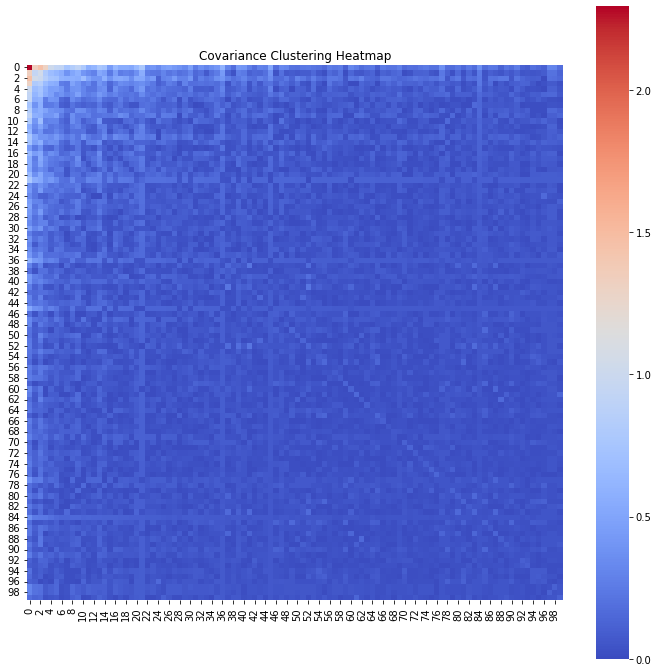

In [81]:
plt.figure(figsize=(12, 12))
sns.heatmap(covariance_matrix, cmap='coolwarm', square=True, annot=False, cbar=True)
plt.title('Covariance Clustering Heatmap')
plt.show()

In [69]:
import numpy as np
cov_matrix = covariance_matrix

# Compute the standard deviations of the variables
std_devs = np.sqrt(np.diag(cov_matrix))

# Normalize the covariance matrix to obtain the correlation matrix
correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)


In [70]:
correlation_matrix

array([[1.        , 0.9038919 , 0.96507598, ..., 1.09668331, 0.96348765,
        0.36115924],
       [0.9038919 , 1.        , 1.07609501, ..., 1.11350872, 1.02142852,
        0.39966753],
       [0.96507598, 1.07609501, 1.        , ..., 1.04756142, 0.89636592,
        0.44907353],
       ...,
       [1.09668331, 1.11350872, 1.04756142, ..., 1.        , 2.99141254,
        0.79793875],
       [0.96348765, 1.02142852, 0.89636592, ..., 2.99141254, 1.        ,
        0.73195421],
       [0.36115924, 0.39966753, 0.44907353, ..., 0.79793875, 0.73195421,
        1.        ]])

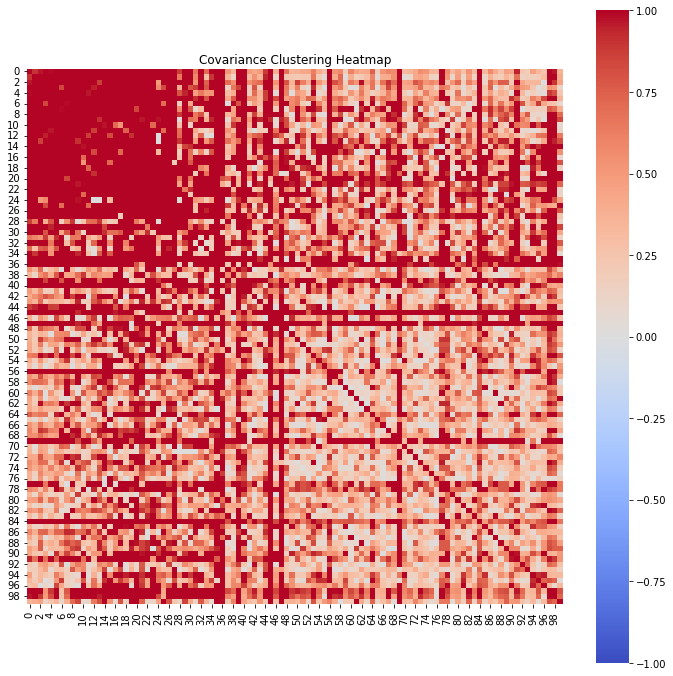

In [71]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm',vmin=-1, vmax=1, square=True, annot=False, cbar=True)
plt.title('Covariance Clustering Heatmap')
plt.show()

# NOW WE WILL NOT DO FROM SCRATCH BUT USE PACKAGES

In [72]:
import numpy as np
import pandas as pd


# Create a pandas DataFrame from the co-occurrence matrix
cooccurrence_df = pd.DataFrame(cooccurrence_matrix)

# Calculate the covariance matrix
covariance_matrix_py = cooccurrence_df.cov()

# Calculate the correlation matrix
correlation_matrix_py = cooccurrence_df.corr()


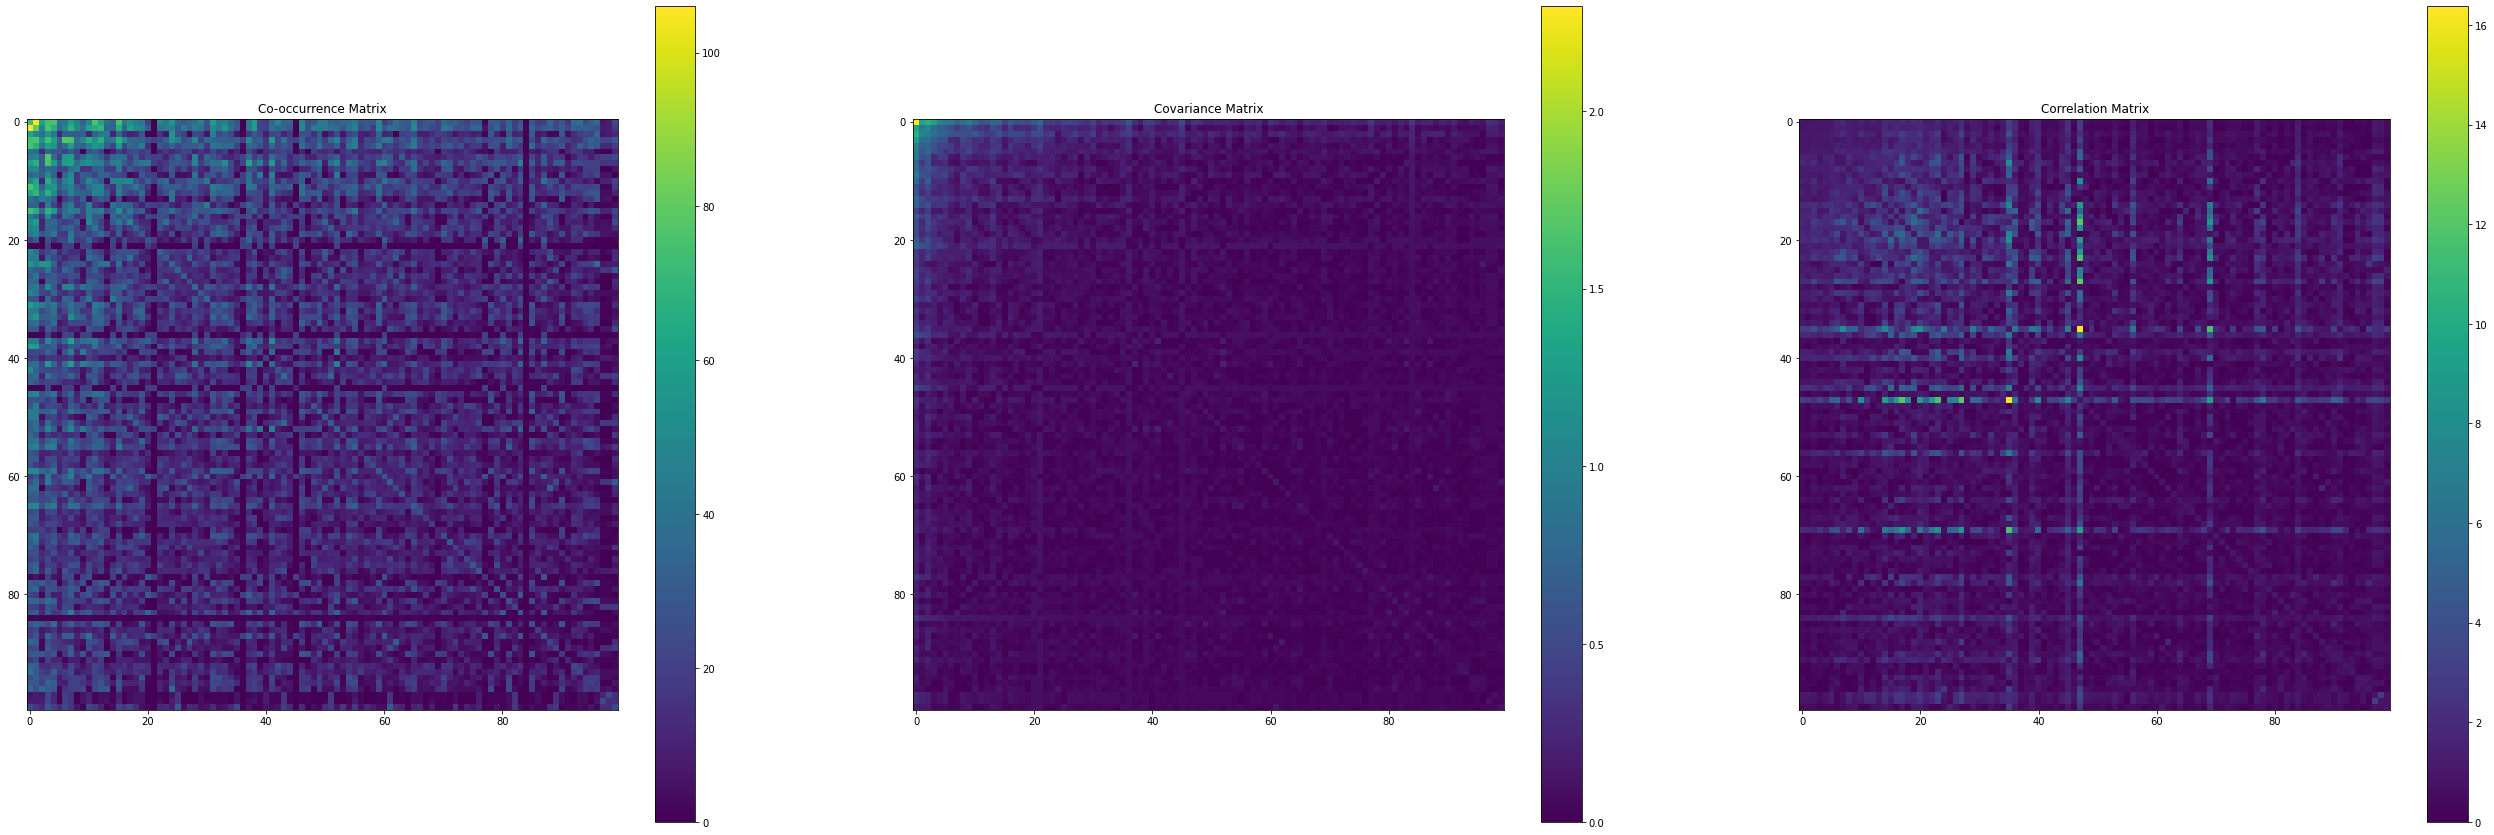

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(45, 15))

# Co-occurrence matrix
im1 = axes[0].imshow(cooccurrence_matrix, cmap='viridis')
axes[0].set_title('Co-occurrence Matrix')
fig.colorbar(im1, ax=axes[0])

# Covariance matrix
im2 = axes[1].imshow(covariance_matrix, cmap='viridis')
axes[1].set_title('Covariance Matrix')
fig.colorbar(im2, ax=axes[1])

# Correlation matrix
im3 = axes[2].imshow(correlation_matrix, cmap='viridis')
axes[2].set_title('Correlation Matrix')
fig.colorbar(im3, ax=axes[2])

plt.show()

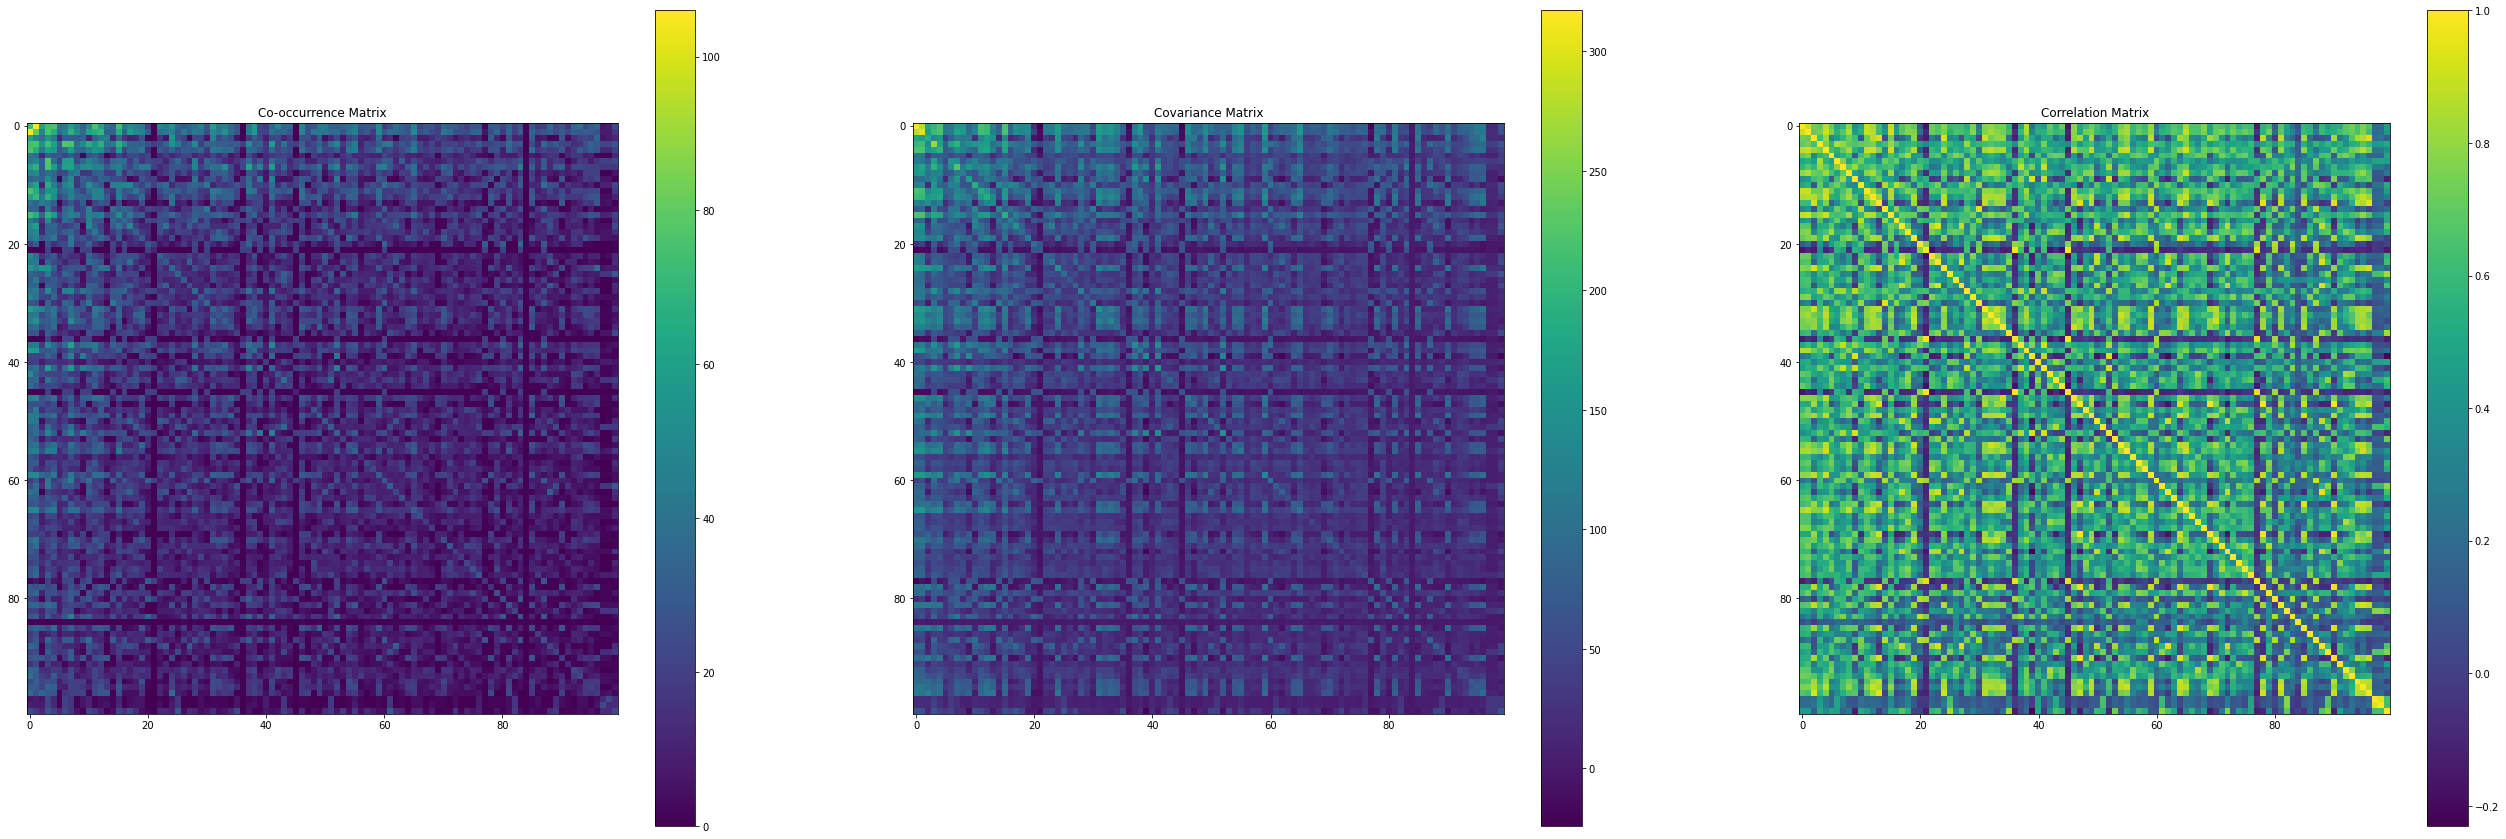

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(45, 15))

# Co-occurrence matrix
im1 = axes[0].imshow(cooccurrence_matrix, cmap='viridis')
axes[0].set_title('Co-occurrence Matrix')
fig.colorbar(im1, ax=axes[0])

# Covariance matrix
im2 = axes[1].imshow(covariance_matrix_py, cmap='viridis')
axes[1].set_title('Covariance Matrix')
fig.colorbar(im2, ax=axes[1])

# Correlation matrix
im3 = axes[2].imshow(correlation_matrix_py, cmap='viridis')
axes[2].set_title('Correlation Matrix')
fig.colorbar(im3, ax=axes[2])

plt.show()